In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-final/heart_statlog_cleveland_hungary_final.csv


In [2]:
!pip install ydata-profiling
!pip install pywaffle
!pip install highlight-text
!pip install pillow
!pip install xgboost
!pip install yellowbrick



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.8.1 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.0 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5

In [3]:
!pip install pywaffle


In [4]:
pip install highlight_text

Note: you may need to restart the kernel to use updated packages.


In [5]:

import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import os
import yellowbrick
import pickle
import joblib

from matplotlib.patches import PathPatch
from matplotlib.patheffects import withStroke
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from ydata_profiling import ProfileReport
from pywaffle import Waffle
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from matplotlib.collections import PathCollection
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef, precision_recall_curve, average_precision_score, roc_curve
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette


# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')





In [6]:

# Read the CSV file
df = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-final/heart_statlog_cleveland_hungary_final.csv")
# Print the first few rows of the DataFrame with background gradient
print('.: Imported Dataset :.')
print('*' * 23)
df.head().style.background_gradient(cmap='Reds')


.: Imported Dataset :.
***********************


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.000000,1,0
1,49,0,3,160,180,0,0,156,0,1.000000,2,1
2,37,1,2,130,283,0,1,98,0,0.000000,1,0
3,48,0,4,138,214,0,0,108,1,1.500000,2,1
4,54,1,3,150,195,0,0,122,0,0.000000,1,0


In [7]:
# renaming features to proper name
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'target']

In [8]:
# converting features to categorical features

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'



df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'



df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [9]:
df['chest_pain_type'].value_counts()

chest_pain_type
asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: count, dtype: int64

In [10]:
df['rest_ecg'].value_counts()

rest_ecg
normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [11]:
df['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
0                1
Name: count, dtype: int64

In [12]:
#dropping row with st_slope =0
df.drop(df[df.st_slope ==0].index, inplace=True)
#checking distribution
df['st_slope'].value_counts()

st_slope
flat           582
upsloping      526
downsloping     81
Name: count, dtype: int64

In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [14]:
# --- Dataset Report ---
color_line = '#FF5733'
ProfileReport(df, title='Heart Disease Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': color_line}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [15]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1189 non-null   int64  
 1   sex                      1189 non-null   object 
 2   chest_pain_type          1189 non-null   object 
 3   resting_blood_pressure   1189 non-null   int64  
 4   cholesterol              1189 non-null   int64  
 5   fasting_blood_sugar      1189 non-null   int64  
 6   rest_ecg                 1189 non-null   object 
 7   max_heart_rate_achieved  1189 non-null   int64  
 8   exercise_induced_angina  1189 non-null   int64  
 9   st_depression            1189 non-null   float64
 10  st_slope                 1189 non-null   object 
 11  target                   1189 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 120.8+ KB
None


In [16]:
print("\nDataset Detail:")
print(df.shape)


Dataset Detail:
(1189, 12)


In [17]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'target'],
      dtype='object')

In [18]:
# summary statistics of numerical columns
df.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


Number of Heart Disease Patients: 628
Number of Non-Heart Disease Patients: 561
Percentage of Heart Disease Patients: 52.817493692178296


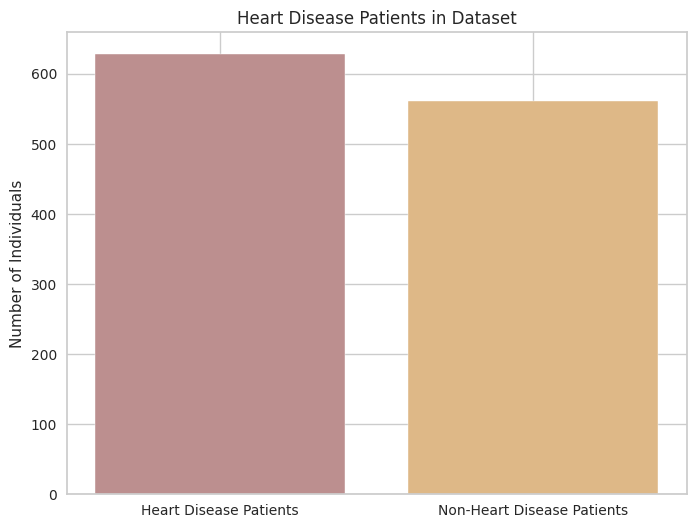

In [19]:


# Calculate the number of heart disease patients in the dataset
num_heart_disease_patients = (df['target'] == 1).sum()

# Calculate the number of non-heart disease patients
num_non_heart_disease_patients = (df['target'] == 0).sum()

# Calculate the percentage of heart disease patients
total_individuals = len(df)
percentage_heart_disease_patients = (num_heart_disease_patients / total_individuals) * 100

print("Number of Heart Disease Patients:", num_heart_disease_patients)
print("Number of Non-Heart Disease Patients:", num_non_heart_disease_patients)
print("Percentage of Heart Disease Patients:", percentage_heart_disease_patients)

# Create a bar plot to visualize the number of heart disease patients
categories = ['Heart Disease Patients', 'Non-Heart Disease Patients']
values = [num_heart_disease_patients, num_non_heart_disease_patients]
colors = ['rosybrown', 'burlywood']

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors)
plt.title('Heart Disease Patients in Dataset')
plt.ylabel('Number of Individuals')
plt.show()


<Figure size 800x600 with 0 Axes>

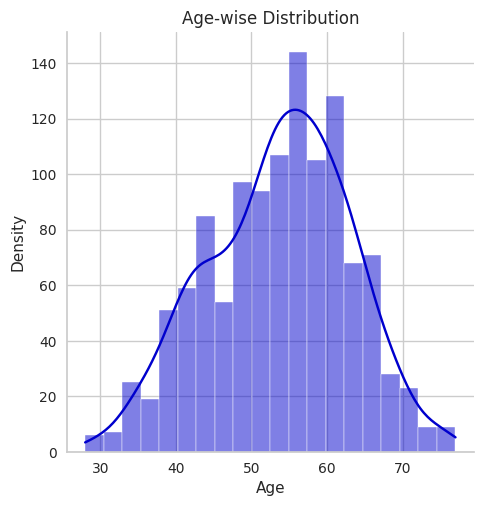

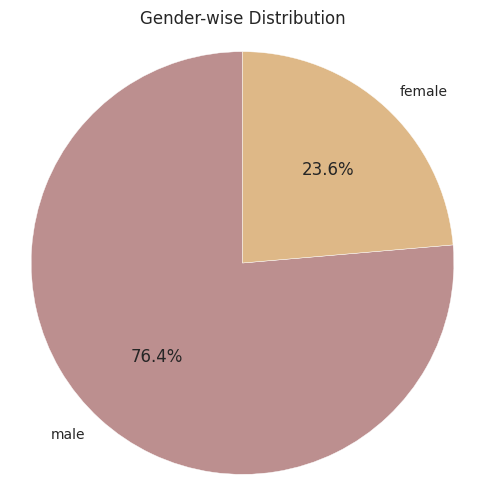

In [20]:
# Age-wise distribution using displot
plt.figure(figsize=(8, 6))
sns.displot(df['age'], kde=True, color='mediumblue')
plt.title('Age-wise Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Assuming 'sex' column contains only two unique values: 'Female' and 'Male'
gender_counts = df['sex'].value_counts()
labels = gender_counts.index.tolist()  # Extract unique values as labels

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['rosybrown', 'burlywood'], startangle=90)
plt.title('Gender-wise Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


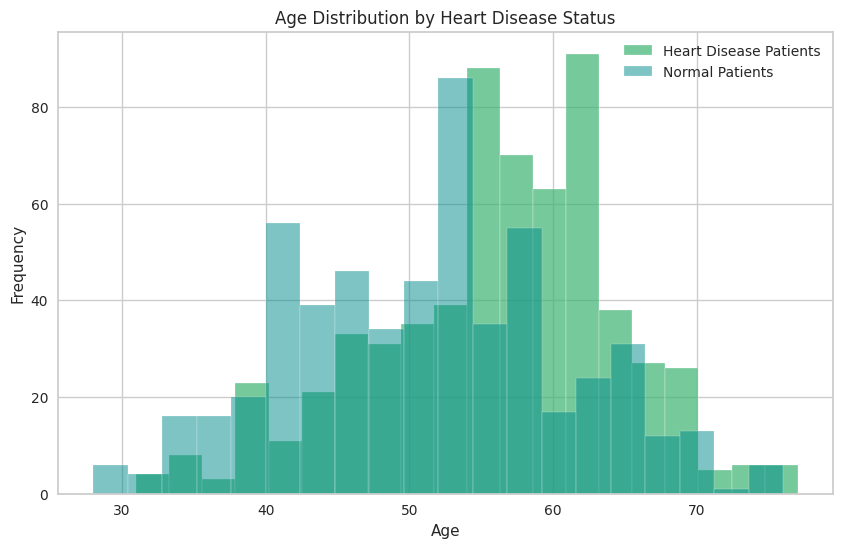

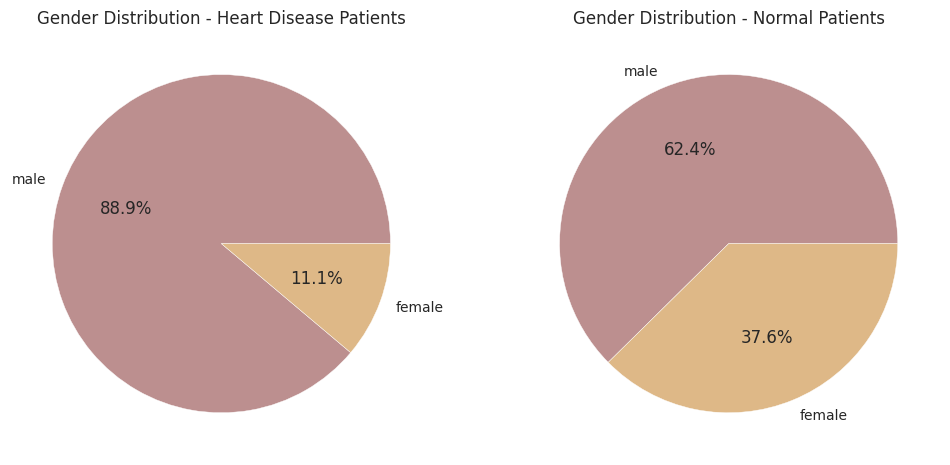

In [21]:

# Separate data for patients with and without heart disease
heart_disease_patients = df[df['target'] == 1]
normal_patients = df[df['target'] == 0]

# Age distribution for patients with heart disease
plt.figure(figsize=(10, 6))
plt.hist(heart_disease_patients['age'], bins=20, color='mediumseagreen', alpha=0.7, label='Heart Disease Patients')
plt.hist(normal_patients['age'], bins=20, color='darkcyan', alpha=0.5, label='Normal Patients')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Gender distribution for patients with heart disease
heart_disease_gender_counts = heart_disease_patients['sex'].value_counts()
normal_gender_counts = normal_patients['sex'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender-wise distribution for heart disease patients
axes[0].pie(heart_disease_gender_counts, labels=heart_disease_gender_counts.index, autopct='%1.1f%%', colors=['rosybrown', 'burlywood'])
axes[0].set_title('Gender Distribution - Heart Disease Patients')

# Gender-wise distribution for normal patients
axes[1].pie(normal_gender_counts, labels=normal_gender_counts.index, autopct='%1.1f%%', colors=['rosybrown', 'burlywood'])
axes[1].set_title('Gender Distribution - Normal Patients')

plt.show()


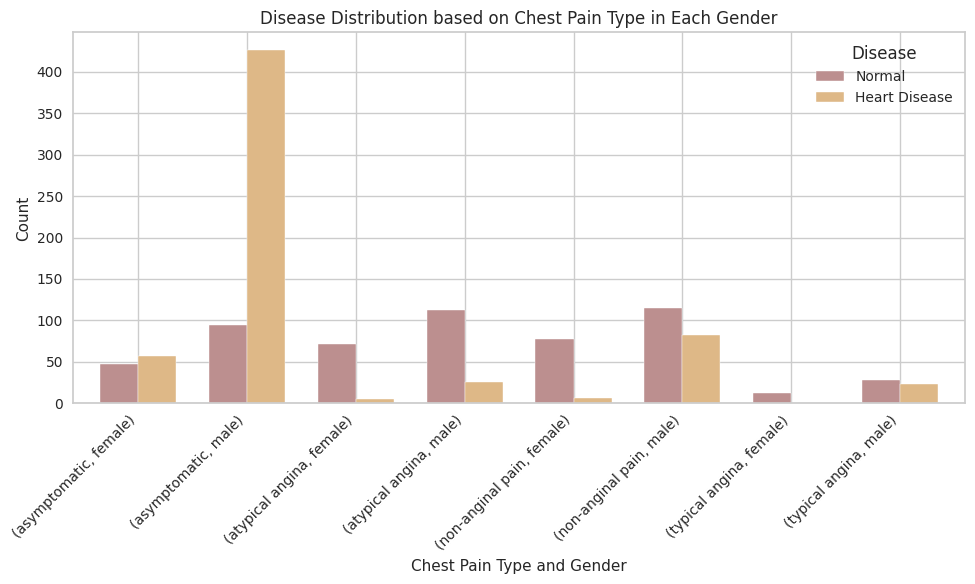

In [22]:


# Filter out rows with missing values in 'chest_pain_type' and 'sex' columns
df = df.dropna(subset=['chest_pain_type', 'sex'])

# Group the data by 'chest_pain_type' and 'sex' and count the occurrences of each combination
grouped = df.groupby(['chest_pain_type', 'sex'])['target'].value_counts().unstack().fillna(0)

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax, color=['rosybrown', 'burlywood'], width=0.7)

# Set labels and title
plt.title('Disease Distribution based on Chest Pain Type in Each Gender')
plt.xlabel('Chest Pain Type and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Disease', labels=['Normal', 'Heart Disease'])

# Show plot
plt.tight_layout()
plt.show()


In [23]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("rosybrown", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,25.310000,76.910000
atypical angina,32.980000,4.940000
non-anginal pain,34.400000,14.170000
typical angina,7.310000,3.980000


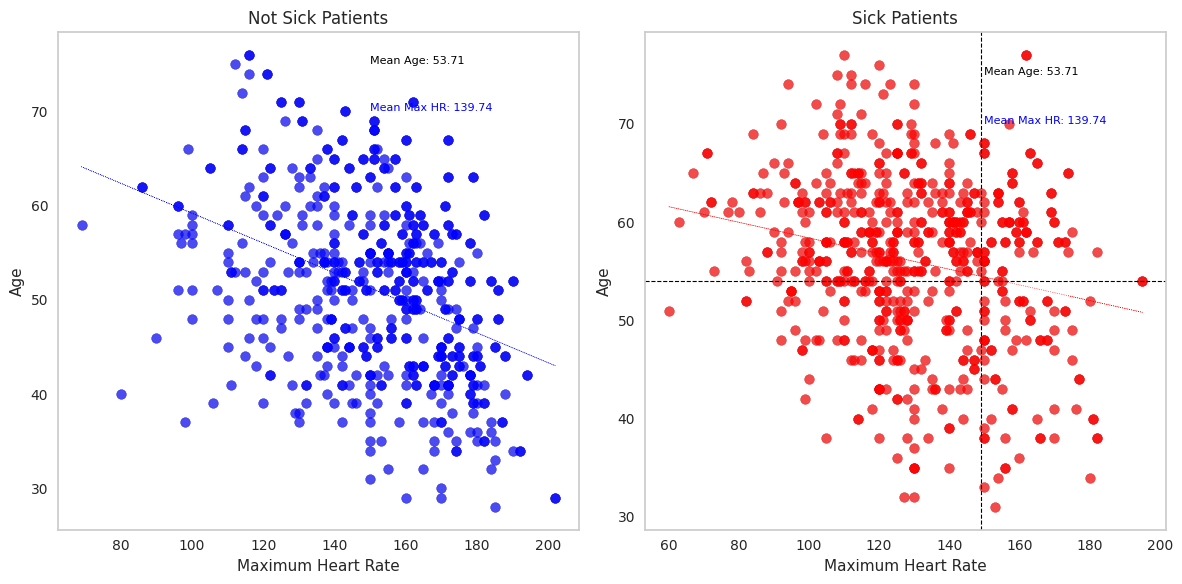

In [24]:
# Constants and settings
scatter_style = dict(alpha=0.8)
color_pallete = ['blue', 'red']
target_labels = ['Not Sick', 'Sick']
highlight_mean = [{'fontsize': 8, 'color': 'black'}, {'fontsize': 8, 'color': 'blue'}]


# Mean calculations
age_mean = df['age'].mean()
thalach_mean = df['max_heart_rate_achieved'].mean()

# Main scatter plot
plt.figure(figsize=(12, 6))

# Sub plots
for idx, target in enumerate(target_labels):
    temp_df = df[df['target'] == idx]
    
    plt.subplot(1, 2, idx + 1)  # Adjusted the subplot index
    
    plt.scatter(temp_df['max_heart_rate_achieved'], temp_df['age'], color='grey', alpha=0.3)
    plt.scatter(temp_df['max_heart_rate_achieved'], temp_df['age'], color=color_pallete[idx], alpha=0.65)
    
    m, b = np.polyfit(temp_df['max_heart_rate_achieved'], temp_df['age'], deg=1)
    plt.plot(temp_df['max_heart_rate_achieved'], m * temp_df['max_heart_rate_achieved'] + b, linewidth=0.5, color=color_pallete[idx], linestyle='dotted')
    
    plt.title(f'{target} Patients')
    plt.xlabel('Maximum Heart Rate')
    plt.ylabel('Age')
    plt.grid(False)

    # Annotate mean values
    plt.text(x=150, y=75, s=f'Mean Age: {age_mean:.2f}', **highlight_mean[0])
    plt.text(x=150, y=70, s=f'Mean Max HR: {thalach_mean:.2f}', **highlight_mean[1])

    # Highlight conditions
    if target == 'Sick':
        # Patients tend to get heart disease are less than 54 years old and have max. heart rate over 149
        plt.axhline(y=54, color='black', linestyle='--', linewidth=0.8)
        plt.axvline(x=149, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()


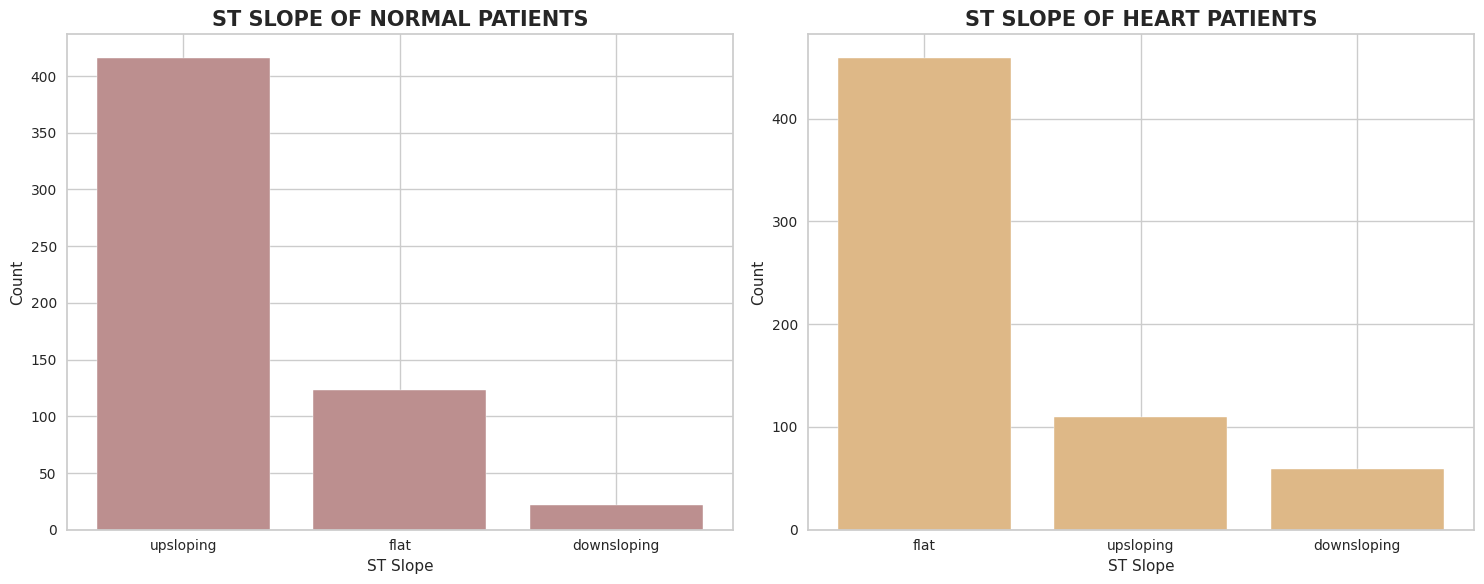

In [25]:

# Data preparation
normal_counts = df[df['target'] == 0]['st_slope'].value_counts()
heart_counts = df[df['target'] == 1]['st_slope'].value_counts()
labels = normal_counts.index

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Normal Patients
axes[0].bar(normal_counts.index, normal_counts.values, color='rosybrown')
axes[0].set_title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')
axes[0].set_xlabel('ST Slope')
axes[0].set_ylabel('Count')

# Heart Patients
axes[1].bar(heart_counts.index, heart_counts.values, color='burlywood')
axes[1].set_title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold')
axes[1].set_xlabel('ST Slope')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [26]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("burlywood", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,3.920000,9.390000
flat,21.930000,73.090000
upsloping,74.150000,17.520000


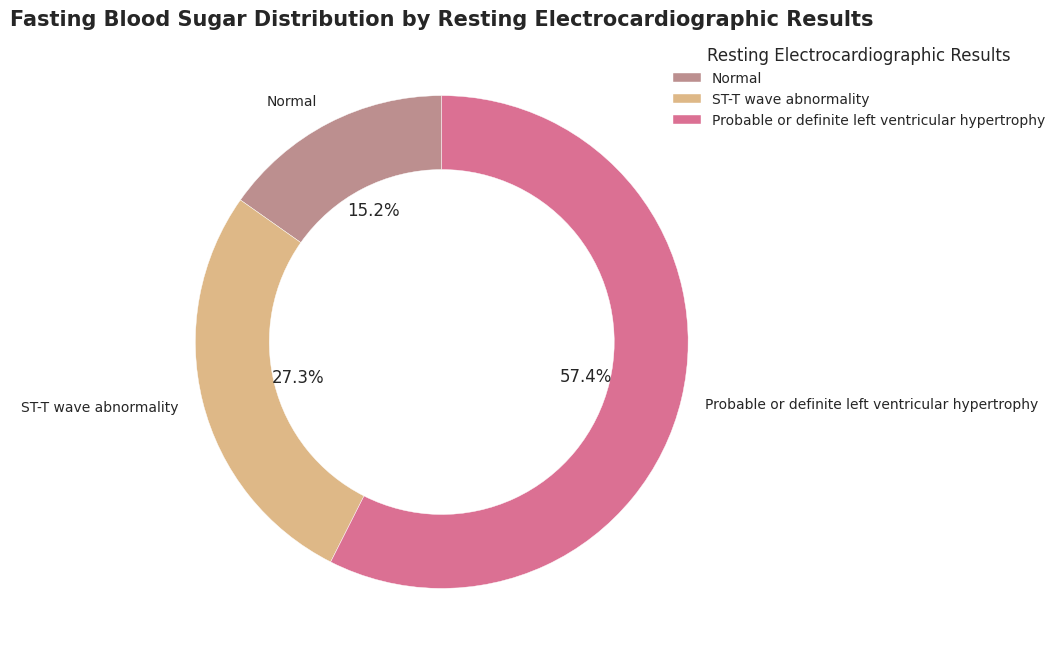

In [27]:
# Data preparation
data = df.groupby(['rest_ecg', 'fasting_blood_sugar']).size().unstack(fill_value=0)
labels = ['Normal', 'ST-T wave abnormality', 'Probable or definite left ventricular hypertrophy']
colors = ['rosybrown', 'burlywood', 'palevioletred']  # Updated colors

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data.sum(axis=1), labels=labels, colors=colors, wedgeprops=dict(width=0.3), autopct='%1.1f%%', startangle=90)
ax.set_title('Fasting Blood Sugar Distribution by Resting Electrocardiographic Results', fontsize=15, weight='bold')
plt.legend(title='Resting Electrocardiographic Results', loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


In [28]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,11.050000,18.950000
left ventricular hypertrophy,26.020000,28.500000
normal,62.920000,52.550000


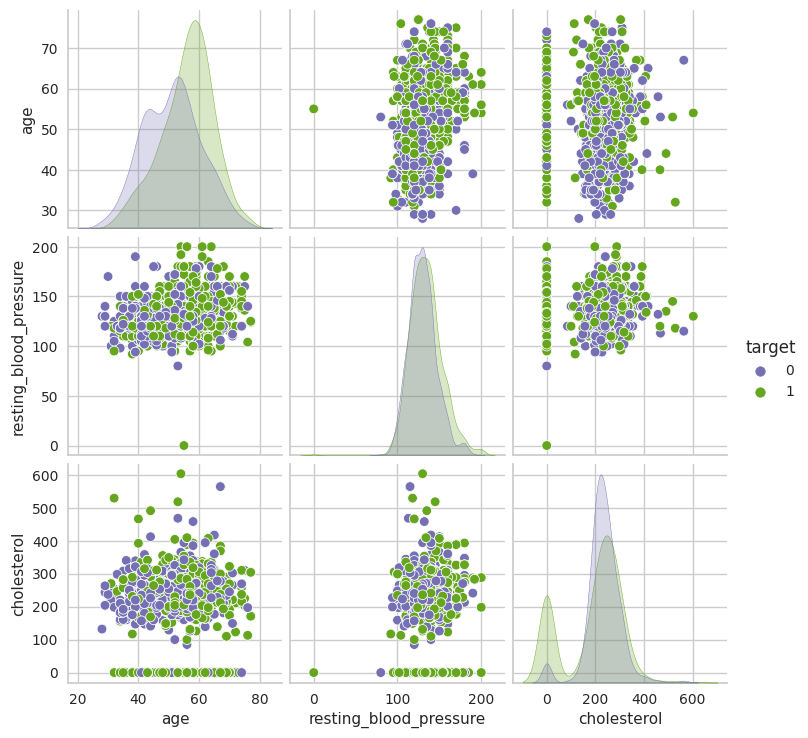

In [29]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

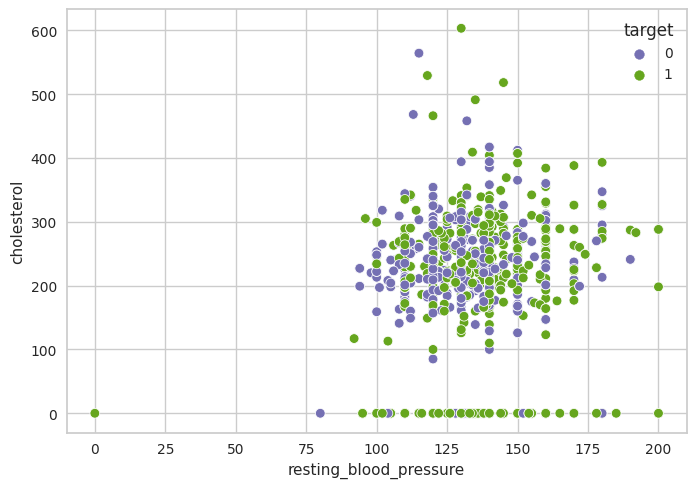

In [30]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = df)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

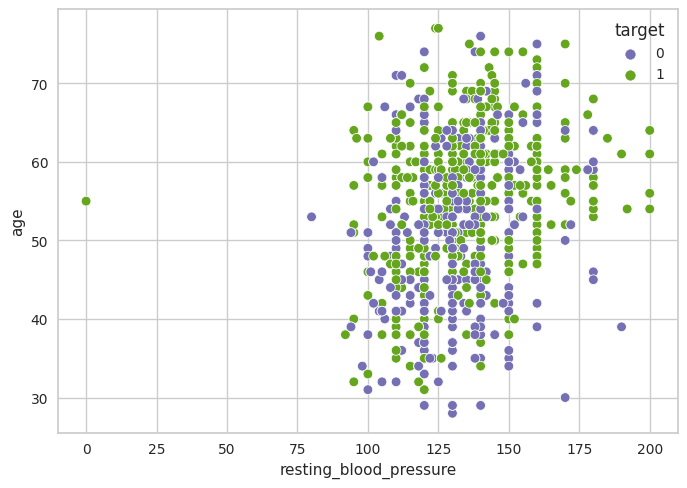

In [31]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df)

In [32]:
# filtering numeric features as age , resting bp, cholestrol and max heart rate achieved has outliers as per EDA

df_numeric = df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved']]

In [33]:
df_numeric.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [34]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(df_numeric))
print(z)

           age  resting_blood_pressure  cholesterol  max_heart_rate_achieved
0     1.466266                0.428136     0.775228                 1.264301
1     0.503599                1.517370     0.299516                 0.637259
2     1.787155                0.116481     0.716067                 1.635766
3     0.610562                0.319212     0.035725                 1.243865
4     0.031216                0.972753     0.151616                 0.695204
...        ...                     ...          ...                      ...
1185  0.931451                1.205715     0.528727                 0.303303
1186  1.528698                0.645983     0.171336                 0.049408
1187  0.352105                0.116481     0.782658                 0.969535
1188  0.352105                0.116481     0.252646                 1.342681
1189  1.680192                0.319212     0.348816                 1.303491

[1189 rows x 4 columns]


In [35]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074]), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1]))


In [36]:
#filtering outliers retaining only those data points which are below threshhold
df = df[(z < 3).all(axis=1)]
# checking shape of dataset after outlier removal
df.shape

(1172, 12)

In [37]:
## encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

df.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
0,40,140,289,0,172,0,0.0,0,True,True,False,False,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,False,True,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,True,False,False,False,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,True,False,True,False,False,True,False,True


In [38]:
# checking the shape of dataset
df.shape

(1172, 16)

In [39]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['target'],axis=1)
y = df['target']

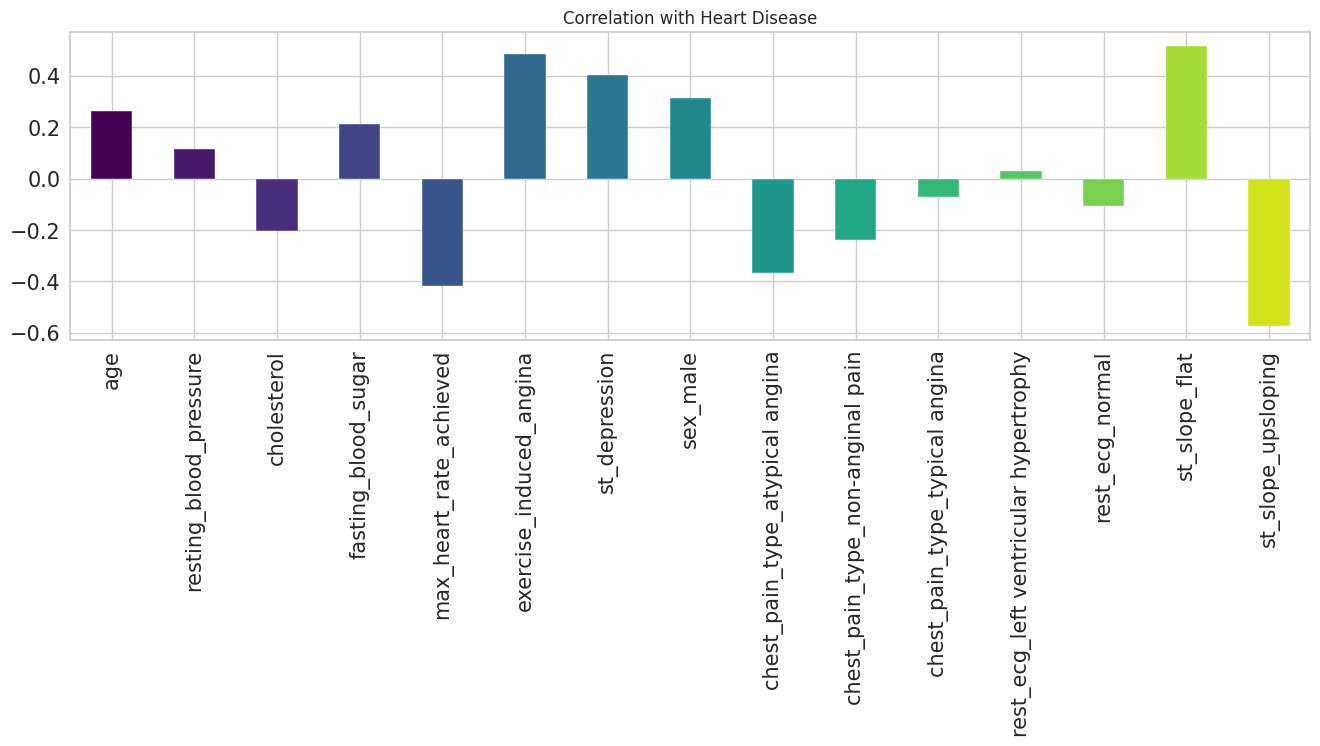

In [40]:

# Calculate correlations
correlation = X.corrwith(y)

# Plot
correlation.plot.bar(
    figsize=(16, 4),
    title="Correlation with Heart Disease",
    fontsize=15,
    rot=90,
    grid=True,
    color=[plt.cm.viridis(i/len(correlation)) for i in range(len(correlation))]
)
plt.show()


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [42]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
target
1    491
0    446
Name: count, dtype: int64
Distribution of traget variable in test set
target
1    123
0    112
Name: count, dtype: int64


In [43]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(937, 15)
(937,)
------------Test Set------------------
(235, 15)
(235,)


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.193548,0.000000,1,0.303704,1,0.454545,True,False,False,False,False,True,False,False
253,0.673469,0.354839,0.594705,0,0.355556,1,0.194805,True,False,False,False,False,False,False,True
273,0.551020,0.516129,0.409369,0,0.466667,1,0.584416,True,False,False,False,False,True,True,False
111,0.591837,0.623656,0.519348,0,0.185185,1,0.584416,True,False,False,False,False,True,True,False
50,0.448980,0.408602,0.474542,0,0.400000,1,0.454545,True,False,False,False,False,True,True,False


In [45]:
X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.301075,0.572301,0,0.266667,0,0.376623,True,True,False,False,True,False,True,False
182,0.469388,0.408602,0.456212,0,0.614815,0,0.194805,True,True,False,False,False,True,False,True
785,0.346939,0.494624,0.480652,0,0.629630,1,0.220779,False,False,False,False,True,False,True,False
924,0.591837,0.623656,0.562118,0,0.333333,1,0.272727,True,False,False,False,True,False,True,False
780,0.612245,0.387097,0.527495,0,0.466667,1,0.584416,True,False,False,False,True,False,True,False


In [46]:
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR_L2', LogisticRegression(penalty='l2')))
    basedModels.append(('LDA', LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7', KNeighborsClassifier(7)))
    basedModels.append(('KNN5', KNeighborsClassifier(5)))
    basedModels.append(('KNN9', KNeighborsClassifier(9)))
    basedModels.append(('KNN11', KNeighborsClassifier(11)))
    basedModels.append(('CART', DecisionTreeClassifier()))
    basedModels.append(('NB', GaussianNB()))
    basedModels.append(('SVM Linear', SVC(kernel='linear', gamma='auto', probability=True)))
    basedModels.append(('SVM RBF', SVC(kernel='rbf', gamma='auto', probability=True)))
    basedModels.append(('AB', AdaBoostClassifier()))
    basedModels.append(('GBM', GradientBoostingClassifier(n_estimators=100, max_features='sqrt')))
    basedModels.append(('RF_Ent100', RandomForestClassifier(criterion='entropy', n_estimators=100)))
    basedModels.append(('RF_Gini100', RandomForestClassifier(criterion='gini', n_estimators=100)))
    basedModels.append(('ET100', ExtraTreesClassifier(n_estimators=100)))
    basedModels.append(('ET500', ExtraTreesClassifier(n_estimators=500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', XGBClassifier(n_estimators=2000)))
    basedModels.append(('XGB_500', XGBClassifier(n_estimators=500)))
    basedModels.append(('XGB_100', XGBClassifier(n_estimators=100)))
    basedModels.append(('XGB_1000', XGBClassifier(n_estimators=1000)))
    basedModels.append(('ET1000', ExtraTreesClassifier(n_estimators=1000)))
    
    return basedModels

# function for performing 10-fold cross-validation of all the baseline models
def BasedLine2(X_train, y_train, models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=num_folds, shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
    return names, results


In [47]:
models = GetBasedModel()
names, results = BasedLine2(X_train, y_train, models)


LR_L2: 0.850526 (0.033387)
LDA: 0.851601 (0.035456)
KNN7: 0.850538 (0.031620)
KNN5: 0.846225 (0.038378)
KNN9: 0.851601 (0.039419)
KNN11: 0.851613 (0.033054)
CART: 0.871963 (0.019569)
NB: 0.847335 (0.034676)
SVM Linear: 0.848421 (0.039710)
SVM RBF: 0.851624 (0.042915)
AB: 0.857984 (0.038486)
GBM: 0.887886 (0.031930)
RF_Ent100: 0.934809 (0.025759)
RF_Gini100: 0.926275 (0.031364)
ET100: 0.923084 (0.032169)
ET500: 0.925235 (0.029943)
MLP: 0.871871 (0.030842)
SGD3000: 0.818600 (0.051869)
XGB_2000: 0.926275 (0.023904)
XGB_500: 0.926287 (0.023831)
XGB_100: 0.925235 (0.018720)
XGB_1000: 0.925212 (0.024613)
ET1000: 0.928426 (0.029614)


In [48]:
rf_ent = RandomForestClassifier(criterion='entropy', n_estimators=100)
rf_ent.fit(X_train, y_train)

# Make predictions
y_pred_rfe = rf_ent.predict(X_test)

# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy:", accuracy)

Accuracy: 0.8978723404255319


In [49]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", accuracy)

Accuracy: 0.825531914893617


In [50]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.8085106382978723


In [51]:
et_100 = ExtraTreesClassifier(n_estimators= 100)
et_100.fit(X_train,y_train)
y_pred_et_100 = et_100.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_et_100)
print("Accuracy:", accuracy)

Accuracy: 0.9063829787234042


In [52]:
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.8936170212765957


In [53]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.825531914893617


In [54]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_sgd)
print("Accuracy:", accuracy)

Accuracy: 0.8127659574468085


In [55]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy)

Accuracy: 0.8340425531914893


In [56]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decc)
print("Accuracy:", accuracy)

Accuracy: 0.8382978723404255


In [57]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbm)
print("Accuracy:", accuracy)

Accuracy: 0.8425531914893617


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.897872,0.866667,0.95122,0.839286,0.906977,0.895253,3.681054,0.798545


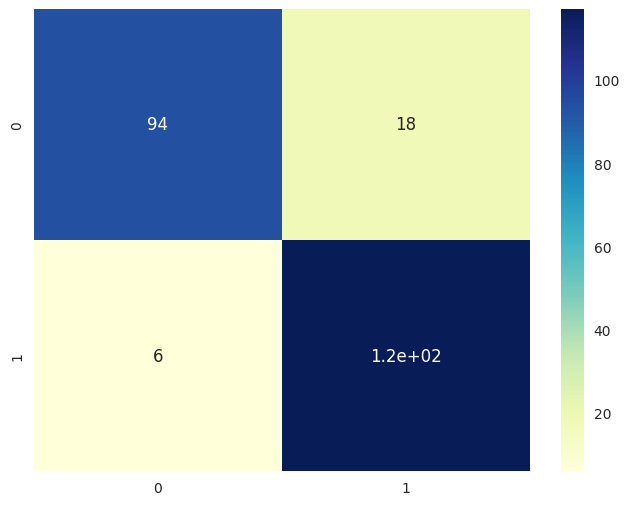

In [58]:

# Calculate confusion matrix
CM = confusion_matrix(y_test, y_pred_rfe)

# Plot confusion matrix using seaborn heatmap with a different color scheme
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, cmap='YlGnBu')  # You can choose any other color map

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN / (TN + FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc = accuracy_score(y_test, y_pred_rfe)
roc = roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)
mathew = matthews_corrcoef(y_test, y_pred_rfe)

# Create a DataFrame to store model results
model_results = pd.DataFrame([[ 'Random Forest', acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                              columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score',
                                       'ROC', 'Log_Loss', 'mathew_corrcoef'])

model_results


In [59]:

data = {
    'MLP': y_pred_mlp, 
    'KNN': y_pred_knn, 
    'EXtra tree classifier': y_pred_et_100,
    'XGB': y_pred_xgb, 
    'SVC': y_pred_svc, 
    'SGD': y_pred_sgd,
    'Adaboost': y_pred_ada, 
    'CART': y_pred_decc, 
    'GBM': y_pred_gbm
}

models = pd.DataFrame(data) 

model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

for column in models:
    CM = confusion_matrix(y_test, models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])
    model_results = pd.concat([model_results, results], ignore_index=True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,MLP,0.825532,0.792857,0.902439,0.741071,0.844106,0.821755,6.288467,0.654925
1,KNN,0.808511,0.786765,0.869919,0.741071,0.826255,0.805495,6.901976,0.618029
2,EXtra tree classifier,0.906383,0.879699,0.951220,0.857143,0.914062,0.904181,3.374299,0.814595
3,XGB,0.893617,0.865672,0.943089,0.839286,0.902724,0.891188,3.834431,0.789339
4,SVC,0.825532,0.801471,0.886179,0.758929,0.841699,0.822554,6.288467,0.652539
5,SGD,0.812766,0.821138,0.821138,0.803571,0.821138,0.812355,6.748599,0.624710
6,Adaboost,0.834043,0.813433,0.886179,0.776786,0.848249,0.831482,5.981713,0.668866
7,CART,0.838298,0.834646,0.861789,0.812500,0.848000,0.837144,5.828335,0.675762
8,GBM,0.842553,0.816176,0.902439,0.776786,0.857143,0.839612,5.674958,0.687049


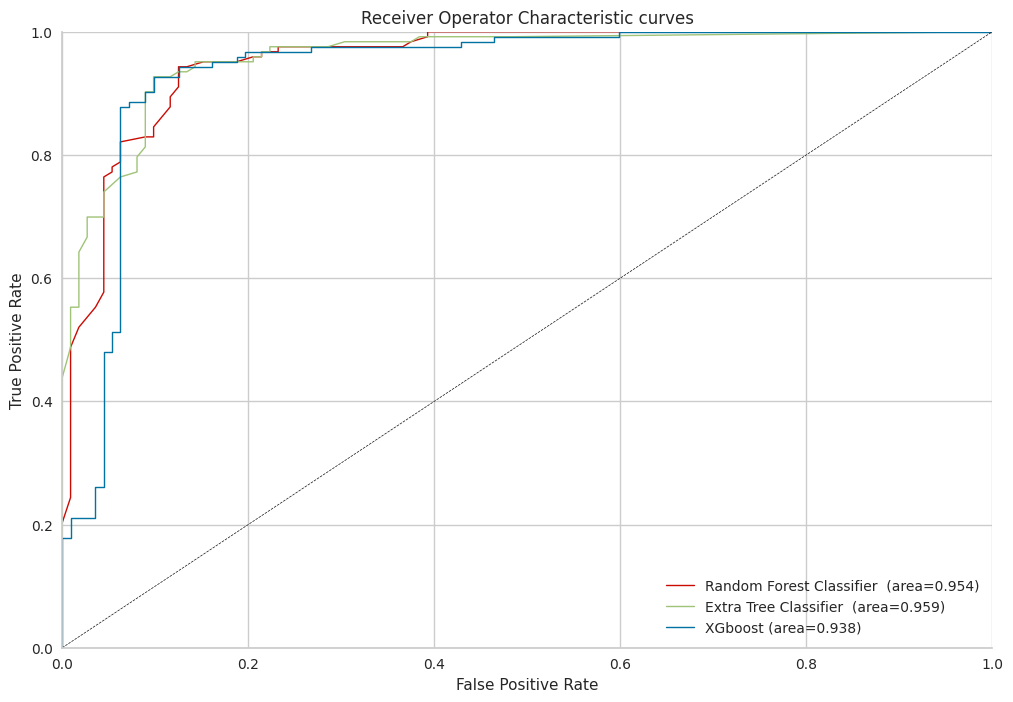

In [60]:

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, color='b'):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw, color=color,
            label="%s (area=%.3f)"%(label, roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

# Assuming rf_ent, et_100, and xgb are your classifiers
roc_auc_plot(y_test, rf_ent.predict_proba(X_test), label='Random Forest Classifier ', l='-', color='r')
roc_auc_plot(y_test, et_100.predict_proba(X_test), label='Extra Tree Classifier ', l='-', color='g')
roc_auc_plot(y_test, xgb.predict_proba(X_test), label='XGboost', l='-', color='b')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

plt.show()


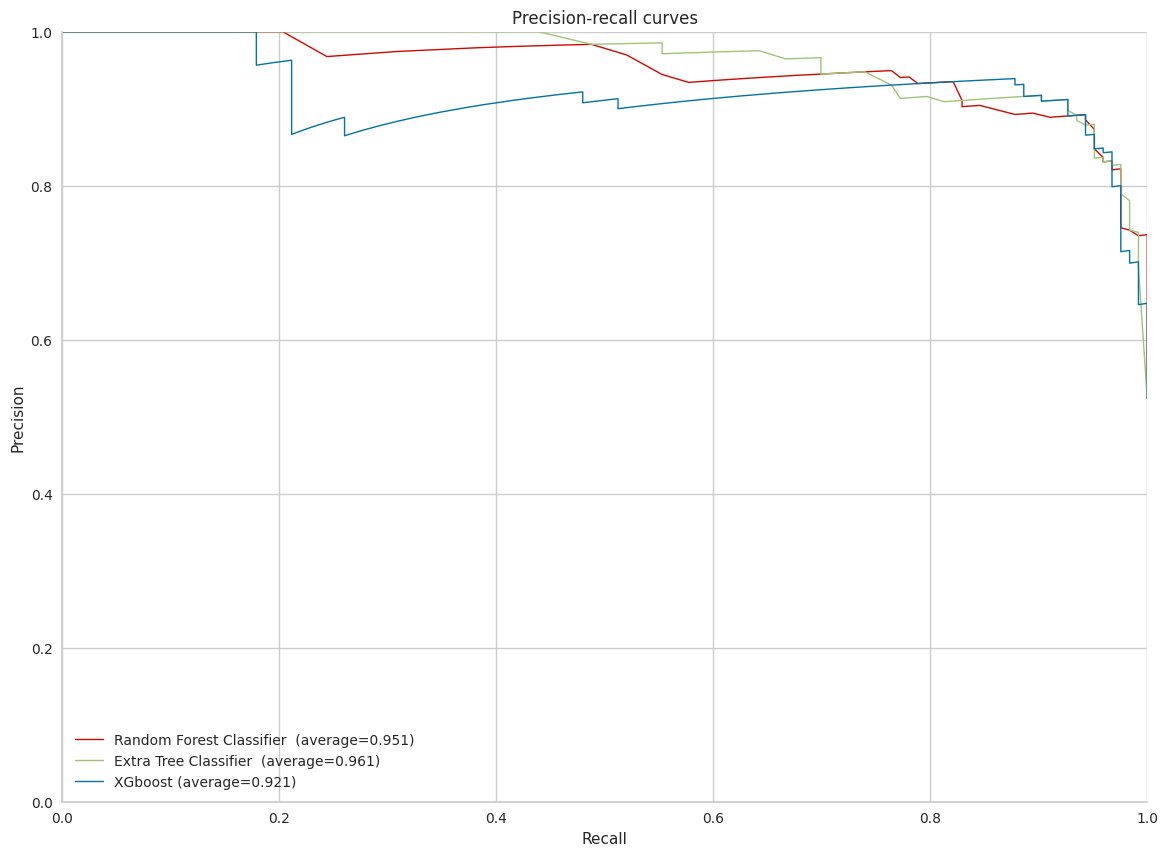

In [61]:

def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0, color='b'):
    precision, recall, _ = precision_recall_curve(y_true, y_proba[:,1])
    average_precision = average_precision_score(y_true, y_proba[:,1], average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw, color=color)

f, ax = plt.subplots(figsize=(14,10))

# Assuming rf_ent, et_100, and xgb are your classifiers
precision_recall_plot(y_test, rf_ent.predict_proba(X_test), label='Random Forest Classifier ', l='-', color='r')
precision_recall_plot(y_test, et_100.predict_proba(X_test), label='Extra Tree Classifier ', l='-', color='g')
precision_recall_plot(y_test, xgb.predict_proba(X_test), label='XGboost', l='-', color='b')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

plt.show()


In [62]:
num_feats=11

def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

11 selected features


In [63]:

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

11 selected features


In [64]:


rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 15 features.
11 selected features


In [65]:

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

7 selected features


In [66]:

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [67]:
# Put all selection together
feature_name = X.columns
feature_selection_df = pd.DataFrame({'Feature': feature_name, 
                                     'Pearson': cor_support, 
                                     'Chi-2': chi_support, 
                                     'RFE': rfe_support, 
                                     'Logistics': embeded_lr_support,
                                     'Random Forest': embeded_rf_support})

# Count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df.iloc[:, 1:], axis=1)

# Display the top num_feats
feature_selection_df = feature_selection_df.sort_values(['Total', 'Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
feature_selection_df.head(num_feats)


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,st_slope_flat,True,True,True,True,True,5
2,st_depression,True,True,True,True,True,5
3,st_slope_upsloping,True,True,True,False,True,4
4,sex_male,True,True,True,True,False,4
5,max_heart_rate_achieved,True,True,True,False,True,4
6,exercise_induced_angina,True,True,True,False,True,4
7,cholesterol,True,False,True,True,True,4
8,chest_pain_type_non-anginal pain,True,True,True,True,False,4
9,chest_pain_type_atypical angina,True,True,True,True,False,4
10,age,True,True,True,False,True,4


In [68]:
# segregating dataset into features i.e., X and target variables i.e., y
X = df.drop(['target','resting_blood_pressure','sex_male','chest_pain_type_non-anginal pain','chest_pain_type_atypical angina'],axis=1)
y = df['target']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

scaler = MinMaxScaler()
X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.fit_transform(X_train[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_train.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
478,0.673469,0.000000,1,0.303704,1,0.454545,False,False,True,False,False
253,0.673469,0.594705,0,0.355556,1,0.194805,False,False,False,False,True
273,0.551020,0.409369,0,0.466667,1,0.584416,False,False,True,True,False
111,0.591837,0.519348,0,0.185185,1,0.584416,False,False,True,True,False
50,0.448980,0.474542,0,0.400000,1,0.454545,False,False,True,True,False


In [70]:
X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']] = scaler.transform(X_test[['age','cholesterol','max_heart_rate_achieved','st_depression']])
X_test.head()

,age,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping
1024,0.693878,0.572301,0,0.266667,0,0.376623,False,True,False,True,False
182,0.469388,0.456212,0,0.614815,0,0.194805,False,False,True,False,True
785,0.346939,0.480652,0,0.629630,1,0.220779,False,True,False,True,False
924,0.591837,0.562118,0,0.333333,1,0.272727,False,True,False,True,False
780,0.612245,0.527495,0,0.466667,1,0.584416,False,True,False,True,False


In [71]:
from xgboost import XGBClassifier

models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR_L2: 0.819515 (0.049077)
LDA: 0.819526 (0.045906)
KNN7: 0.814299 (0.028730)
KNN5: 0.804610 (0.043972)
KNN9: 0.808900 (0.030790)
KNN11: 0.810970 (0.039220)
CART: 0.850538 (0.031681)
NB: 0.823782 (0.047121)
SVM Linear: 0.812022 (0.047971)
SVM RBF: 0.805662 (0.040935)
AB: 0.814139 (0.049168)
GBM: 0.853695 (0.032856)
RF_Ent100: 0.917753 (0.034445)
RF_Gini100: 0.917765 (0.031633)
ET100: 0.915637 (0.031754)
ET500: 0.923130 (0.023928)
MLP: 0.839808 (0.045183)
SGD3000: 0.799165 (0.080070)
XGB_2000: 0.900732 (0.030449)
XGB_500: 0.901784 (0.029227)
XGB_100: 0.910318 (0.026029)
XGB_1000: 0.898593 (0.028184)
ET1000: 0.922066 (0.023558)


In [72]:
from sklearn.ensemble import VotingClassifier

clf1=RandomForestClassifier(criterion='entropy',n_estimators=100)

clf2=DecisionTreeClassifier()
clf3=XGBClassifier(n_estimators= 1000)
clf4=ExtraTreesClassifier(n_estimators= 500)

clf5=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')


eclf1 = VotingClassifier(estimators=[('rfe', clf1), ('decc', clf2), ('xgb', clf3),('ET',clf4),('gb',clf5),], 
                         voting='soft', weights=[4,1,2,3,1])
eclf1.fit(X_train,y_train)
y_pred_sv =eclf1.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.87218,0.943089,0.848214,0.90625,0.895652,3.681054,0.797405


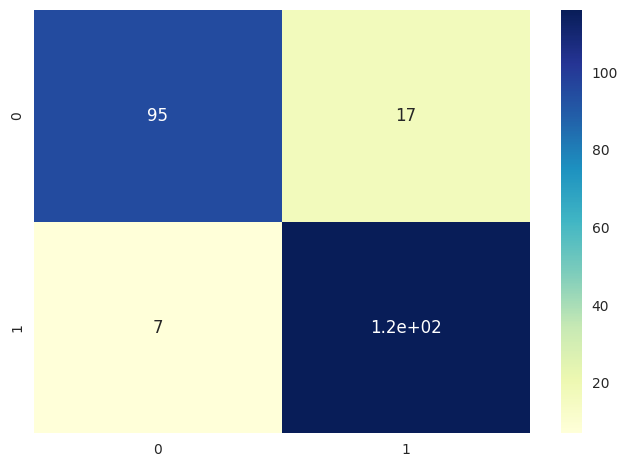

In [73]:
CM=confusion_matrix(y_test,y_pred_sv)
sns.heatmap(CM, annot=True, cmap='YlGnBu')

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_sv)
acc= accuracy_score(y_test, y_pred_sv)
roc=roc_auc_score(y_test, y_pred_sv)
prec = precision_score(y_test, y_pred_sv)
rec = recall_score(y_test, y_pred_sv)
f1 = f1_score(y_test, y_pred_sv)

mathew = matthews_corrcoef(y_test, y_pred_sv)
model_results =pd.DataFrame([['Soft Voting',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results


In [74]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy:", accuracy)

Accuracy: 0.902127659574468


In [75]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", accuracy)

Accuracy: 0.825531914893617


In [76]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.8127659574468085


In [77]:
et_1000 = ExtraTreesClassifier(n_estimators= 1000)
et_1000.fit(X_train,y_train)
y_pred_et1000 = et_1000.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_et1000)
print("Accuracy:", accuracy)

Accuracy: 0.902127659574468


In [78]:
xgb = XGBClassifier(n_estimators= 1000)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.8893617021276595


In [79]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.8085106382978723


In [80]:
sgd = SGDClassifier(max_iter=1000, tol=1e-4)
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_sgd)
print("Accuracy:", accuracy)

Accuracy: 0.8042553191489362


In [81]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy:", accuracy)

Accuracy: 0.825531914893617


In [82]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_decc)
print("Accuracy:", accuracy)

Accuracy: 0.8808510638297873


In [83]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
# Now, evaluate the predictions
accuracy = accuracy_score(y_test, y_pred_gbm)
print("Accuracy:", accuracy)

Accuracy: 0.851063829787234


In [84]:

data = {
    'Soft Voting': y_pred_sv,
    'Random Forest Entropy': y_pred_rfe, 
    'MLP2': y_pred_mlp, 
    'KNN2': y_pred_knn, 
    'EXtra tree classifier': y_pred_et1000,
    'XGB2': y_pred_xgb, 
    'SVC2': y_pred_svc, 
    'SGD2': y_pred_sgd,
    'Adaboost': y_pred_ada, 
    'CART': y_pred_decc, 
    'GBM': y_pred_gbm 
}

models = pd.DataFrame(data) 

model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])

for column in models:
    CM = confusion_matrix(y_test, models[column])
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN / (TN + FP)
    loss_log = log_loss(y_test, models[column])
    acc = accuracy_score(y_test, models[column])
    roc = roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    mathew = matthews_corrcoef(y_test, models[column])
    
    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]], columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log_Loss', 'mathew_corrcoef'])
    
    model_results = pd.concat([model_results, results], ignore_index=True)

model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Soft Voting,0.897872,0.872180,0.943089,0.848214,0.906250,0.895652,3.681054,0.797405
1,Random Forest Entropy,0.902128,0.884615,0.934959,0.866071,0.909091,0.900515,3.527677,0.804719
2,MLP2,0.825532,0.815385,0.861789,0.785714,0.837945,0.823751,6.288467,0.650485
3,KNN2,0.812766,0.806202,0.845528,0.776786,0.825397,0.811157,6.748599,0.624631
4,EXtra tree classifier,0.902128,0.884615,0.934959,0.866071,0.909091,0.900515,3.527677,0.804719
5,XGB2,0.889362,0.870229,0.926829,0.848214,0.897638,0.887522,3.987808,0.779355
6,SVC2,0.808511,0.778571,0.886179,0.723214,0.828897,0.804697,6.901976,0.620202
7,SGD2,0.804255,0.798450,0.837398,0.767857,0.817460,0.802628,7.055353,0.607509
8,Adaboost,0.825532,0.825397,0.845528,0.803571,0.835341,0.824550,6.288467,0.650092
9,CART,0.880851,0.857143,0.926829,0.830357,0.890625,0.878593,4.294563,0.763024


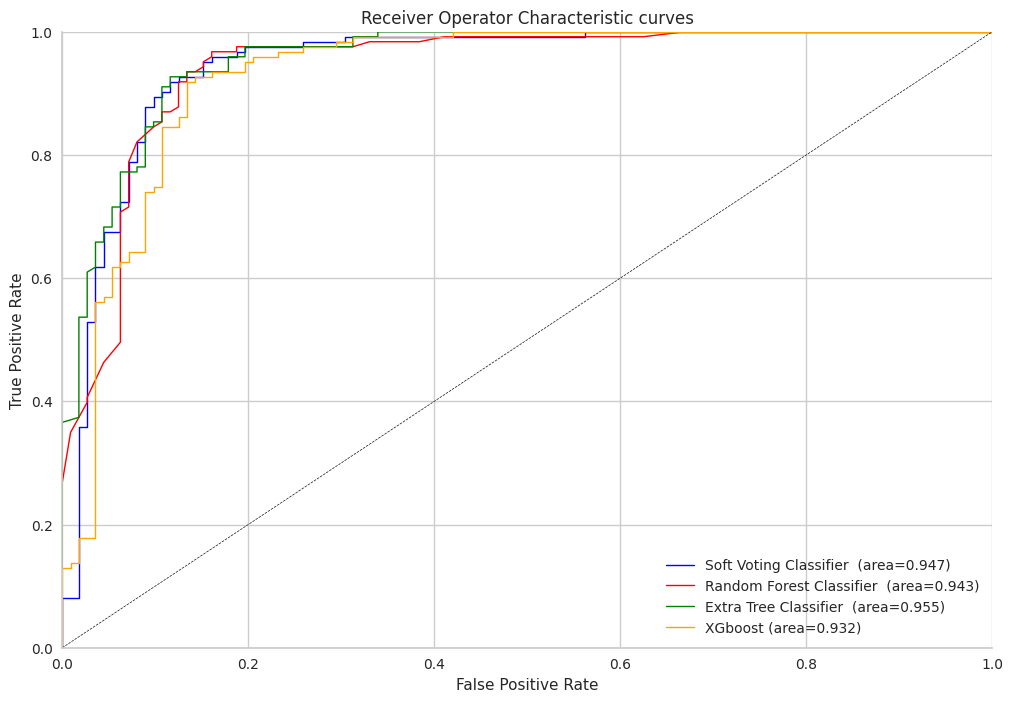

In [85]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, color='blue'):
    
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])), color=color)

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test, eclf1.predict_proba(X_test), label='Soft Voting Classifier ', l='-', color='blue')
roc_auc_plot(y_test, rf_ent.predict_proba(X_test), label='Random Forest Classifier ', l='-', color='red')
roc_auc_plot(y_test, et_1000.predict_proba(X_test), label='Extra Tree Classifier ', l='-', color='green')
roc_auc_plot(y_test, xgb.predict_proba(X_test), label='XGboost', l='-', color='orange')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--')    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

plt.show()


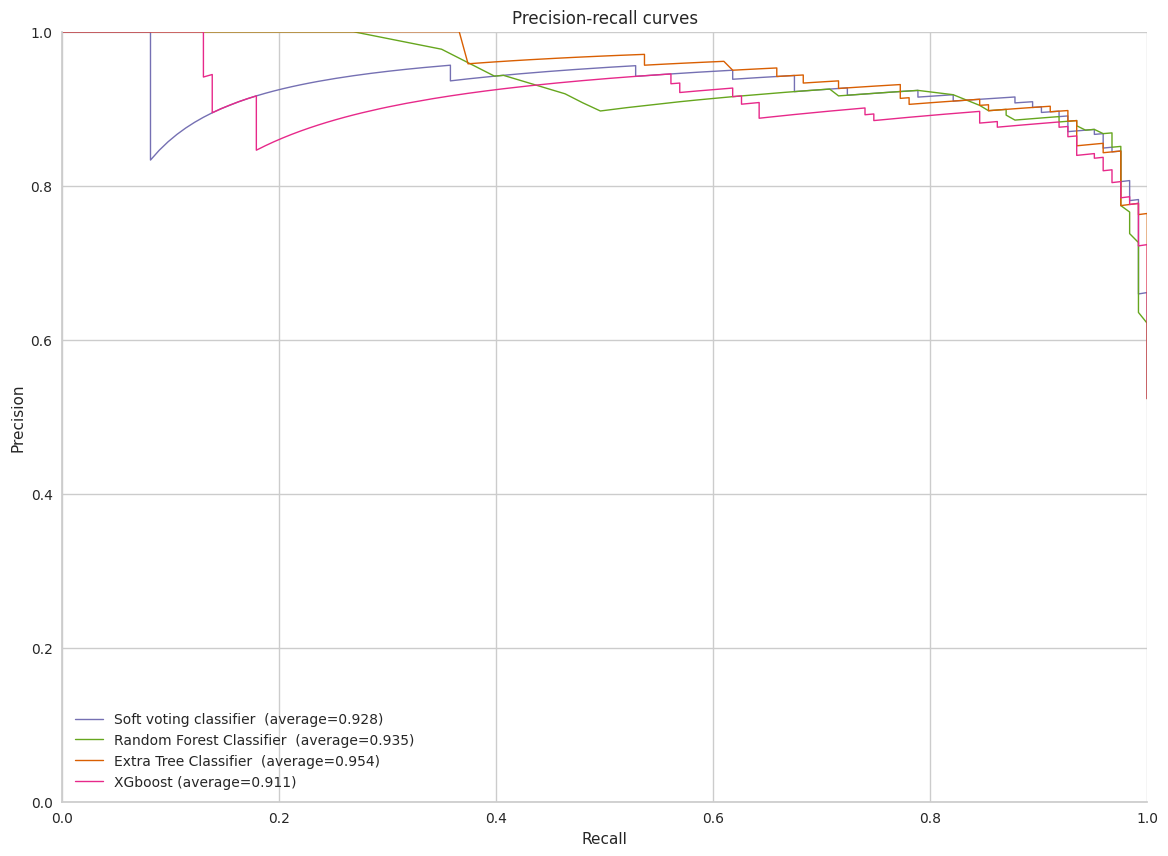

In [86]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0, color='blue'):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))
precision_recall_plot(y_test,eclf1.predict_proba(X_test),label='Soft voting classifier ',l='-')
precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
precision_recall_plot(y_test,et_1000.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

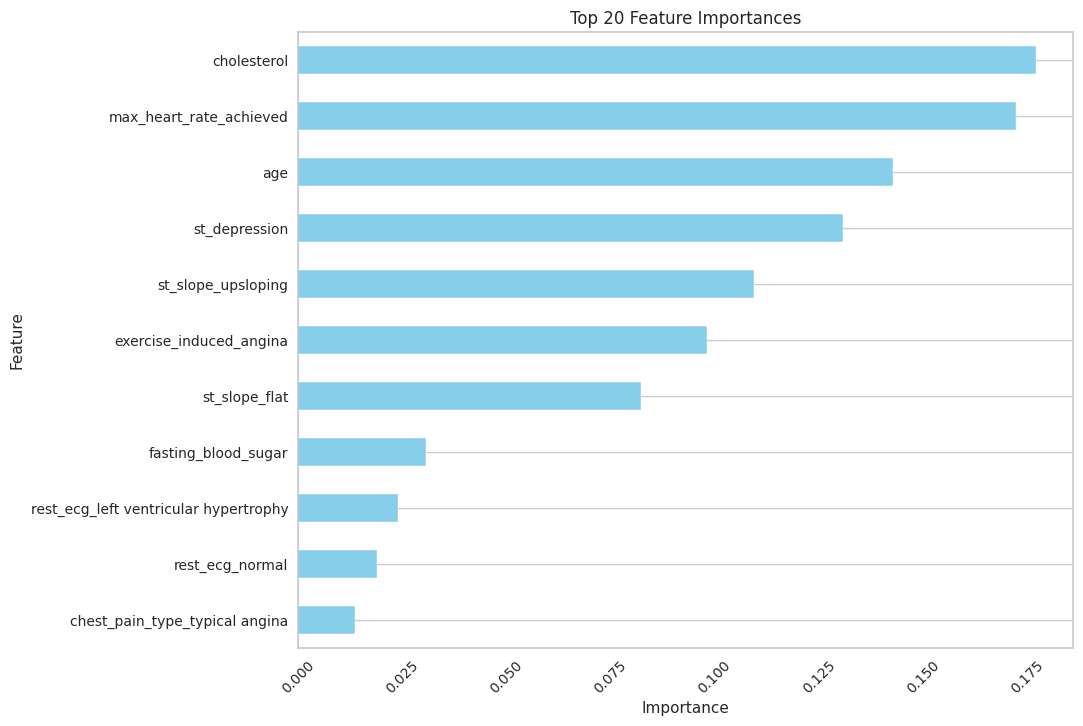

In [87]:
feat_importances = pd.Series(rf_ent.feature_importances_, index=X_train.columns)
# Create a horizontal bar plot with the 20 most important features
plt.figure(figsize=(10, 8))
feat_importances.nlargest(20).plot(kind='barh', color='skyblue')  # Change color here

# Customize plot appearance
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.axvline(x=0, color='gray', linewidth=0.5)
plt.gca().invert_yaxis()

# Show plot
plt.show()